Firstly we are importing all the libraries required

In [38]:
import pandas as pd
import numpy as np
import seaborn as sns
import missingno as msno
import matplotlib.pyplot as plt
%matplotlib inline

Now Below we will perform 

Exploratory Data Analysis and Data Cleaning 

In [39]:
df=pd.read_csv('data.csv')
df.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4240 entries, 0 to 4239
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4240 non-null   int64  
 1   age              4240 non-null   int64  
 2   education        4135 non-null   float64
 3   currentSmoker    4240 non-null   int64  
 4   cigsPerDay       4211 non-null   float64
 5   BPMeds           4187 non-null   float64
 6   prevalentStroke  4240 non-null   int64  
 7   prevalentHyp     4240 non-null   int64  
 8   diabetes         4240 non-null   int64  
 9   totChol          4190 non-null   float64
 10  sysBP            4240 non-null   float64
 11  diaBP            4240 non-null   float64
 12  BMI              4221 non-null   float64
 13  heartRate        4239 non-null   float64
 14  glucose          3852 non-null   float64
 15  TenYearCHD       4240 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 530.1 KB


In [41]:
print("Total number of Null Values in each Column: \n")
df.isnull().sum()

Total number of Null Values in each Column: 



male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

In [42]:
df = df.dropna()

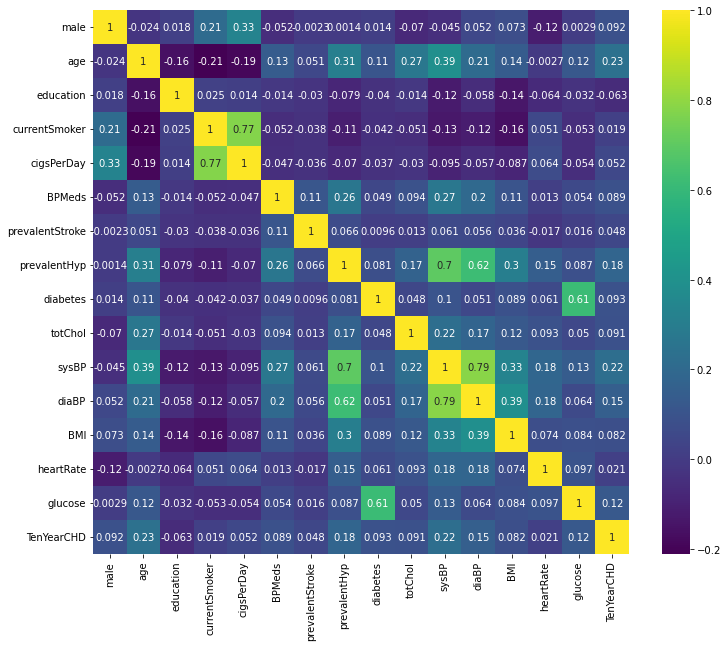

In [43]:


plt.figure(figsize=(12,10))
sns.heatmap(df.corr(),cmap='viridis',annot=True)
corr_matrix = df.corr()


Now on the basis of above correlation matrix we will perform feature Engineering and will select the best features 

for our Model training so we can get the best and accurate predictions

In [44]:
#Below are the Most relevant features for our model Training

cor_target = abs(corr_matrix["TenYearCHD"])
relevant_features = cor_target[cor_target>0.1]
relevant_features

age             0.233983
prevalentHyp    0.181387
sysBP           0.222821
diaBP           0.150124
glucose         0.121990
TenYearCHD      1.000000
Name: TenYearCHD, dtype: float64

In [45]:
to_drop = cor_target[cor_target<0.1]
to_drop_frame = to_drop.to_frame()
to_drop_frame

,TenYearCHD
male,0.091688
education,0.063279
currentSmoker,0.019165
cigsPerDay,0.052014
BPMeds,0.089152
prevalentStroke,0.048366
diabetes,0.093431
totChol,0.091338
BMI,0.082055
heartRate,0.020514


Now on the basis of above analysis we have the columns to keep and the columns to discard

In [46]:

row_names = to_drop_frame.index
row_names_list = list(row_names)
row_names_list.append('TenYearCHD')
y = df['TenYearCHD']
X = df.drop(row_names_list, axis=1).values


Now in Below section we are Applying Logistic Regression Model and then will predict the test data and check how accurate our Model is Working

In [47]:
#@title Now Training Data For Logistic Regression Model 


from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.5, random_state=101)

from sklearn.linear_model import LogisticRegression

log_model=LogisticRegression()

log_model.fit(X_train,y_train)
y_pred=log_model.predict(X_test)





f:\anaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


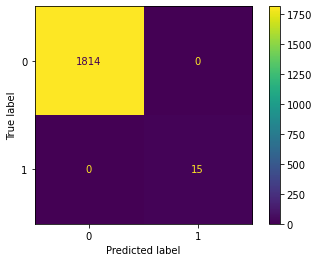

In [48]:
from sklearn.metrics import plot_confusion_matrix,accuracy_score,classification_report

plot_confusion_matrix(log_model, X_test, y_pred)

In [49]:
print("The Accuracy of our Model is :",accuracy_score(y_test,y_pred)*100)


The Accuracy of our Model is : 85.56588299617277


In [50]:
# Now here we will get our classification report

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.86      1.00      0.92      1558
           1       0.73      0.04      0.08       271

    accuracy                           0.86      1829
   macro avg       0.80      0.52      0.50      1829
weighted avg       0.84      0.86      0.80      1829

